In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
import pandas as pd
import matplotlib.pyplot as plt


In [45]:
dir = "/content/drive/MyDrive/Kaggle/Titanic/"

In [221]:
train_file = dir + "train.csv"
test_file = dir + "test.csv"

In [222]:
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

print(len(train_df), len(test_df))

891 418


In [223]:
# train_df.head()

# Preprocessing


In [224]:
# One hot encoding for Embarked col
arr_Embarked = train_df['Embarked'].unique()
dic_Embarked = {'S': 0, 'C': 1, 'Q': 2, 'nan': 4}

# print(arr_Embarked)

def em2idx(string):
    return dic_Embarked[f'{string}']

In [225]:
def gender_filter(string):
    if string == 'male':
        return 0
    else:
        return 1

In [226]:
def preprocessing(df):
    # print(type(df))
    df = df.set_index('PassengerId')

    df = df.drop(columns = ['Name', 'Ticket', 'Fare', 'Cabin'])

    # gender one hot encoding
    df['Sex'] = df['Sex'].apply(gender_filter)

    # one hot encoding for Embarked
    df['Embarked'] = df['Embarked'].apply(em2idx)

    # Fill Nan
    for col in df.columns:
        mean_value = df[f'{col}'].mean()
        # print(mean_value)
        df[f'{col}'].fillna(value=mean_value, inplace=True)
        # print(df.head())

    return df

In [227]:
print(type(train_df))
train_df = preprocessing(train_df)
train_df.head()

<class 'pandas.core.frame.DataFrame'>
0.3838383838383838
             Survived  Pclass  Sex   Age  SibSp  Parch  Embarked
PassengerId                                                     
1                   0       3    0  22.0      1      0         0
2                   1       1    1  38.0      1      0         1
3                   1       3    1  26.0      0      0         0
4                   1       1    1  35.0      1      0         0
5                   0       3    0  35.0      0      0         0
2.308641975308642
             Survived  Pclass  Sex   Age  SibSp  Parch  Embarked
PassengerId                                                     
1                   0       3    0  22.0      1      0         0
2                   1       1    1  38.0      1      0         1
3                   1       3    1  26.0      0      0         0
4                   1       1    1  35.0      1      0         0
5                   0       3    0  35.0      0      0         0
0.3524130190796

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,,
1,0,3,0,22.0,1,0,0
2,1,1,1,38.0,1,0,1
3,1,3,1,26.0,0,0,0
4,1,1,1,35.0,1,0,0
5,0,3,0,35.0,0,0,0


<Axes: >

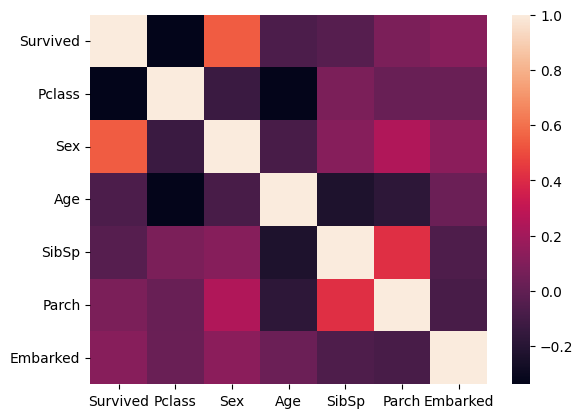

In [228]:
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix on the numeric columns
corr = train_df.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr)

In [229]:
test_df = preprocessing(test_df)
test_df.head()

2.2655502392344498
             Pclass  Sex   Age  SibSp  Parch  Embarked
PassengerId                                           
892               3    0  34.5      0      0         2
893               3    1  47.0      1      0         0
894               2    0  62.0      0      0         2
895               3    0  27.0      0      0         0
896               3    1  22.0      1      1         0
0.36363636363636365
             Pclass  Sex   Age  SibSp  Parch  Embarked
PassengerId                                           
892               3    0  34.5      0      0         2
893               3    1  47.0      1      0         0
894               2    0  62.0      0      0         2
895               3    0  27.0      0      0         0
896               3    1  22.0      1      1         0
30.272590361445783
             Pclass  Sex   Age  SibSp  Parch  Embarked
PassengerId                                           
892               3    0  34.5      0      0         2
893    

,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,
892,3,0,34.5,0,0,2
893,3,1,47.0,1,0,0
894,2,0,62.0,0,0,2
895,3,0,27.0,0,0,0
896,3,1,22.0,1,1,0


# Linear Reg Model

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model's performance (e.g., using mean squared error)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.134213088682776


In [231]:
pred = model.predict(test_df)
# print(test_df.describe())
len(pred)

418

In [232]:
sub = test_df.copy()
sub['Survived'] = pred
print(test_df.head())
print(sub.head())

             Pclass  Sex   Age  SibSp  Parch  Embarked
PassengerId                                           
892               3    0  34.5      0      0         2
893               3    1  47.0      1      0         0
894               2    0  62.0      0      0         2
895               3    0  27.0      0      0         0
896               3    1  22.0      1      1         0
             Pclass  Sex   Age  SibSp  Parch  Embarked  Survived
PassengerId                                                     
892               3    0  34.5      0      0         2  0.156317
893               3    1  47.0      1      0         0  0.483357
894               2    0  62.0      0      0         2  0.191433
895               3    0  27.0      0      0         0  0.108701
896               3    1  22.0      1      1         0  0.593629


In [233]:
def thresholding(x):
    if x > 0.5:
        return 1
    else:
        return 0


sub['Survived'] = sub['Survived'].apply(thresholding)
sub = sub.drop(columns = ['Age', 'SibSp','Pclass', 'Sex', 'Parch', 'Embarked'])
sub.head()


,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [234]:
sub.to_csv('submission.csv')